<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45718 entries, 0 to 45717
Data columns (total 64 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sAddress         45718 non-null  object 
 1   rAddress         45718 non-null  object 
 2   sMACs            45718 non-null  object 
 3   rMACs            45718 non-null  object 
 4   sIPs             44156 non-null  object 
 5   rIPs             44156 non-null  object 
 6   protocol         45718 non-null  object 
 7   startDate        45718 non-null  object 
 8   endDate          45718 non-null  object 
 9   start            45718 non-null  float64
 10  end              45718 non-null  float64
 11  startOffset      45718 non-null  float64
 12  endOffset        45718 non-null  float64
 13  duration         45718 non-null  float64
 14  sPackets         45718 non-null  int64  
 15  rPackets         45718 non-null  int64  
 16  sBytesSum        45718 non-null  int64  
 17  rBytesSum   

/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3175/3175 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - accuracy: 0.5566 - loss: 1.0989 - val_accuracy: 0.6366 - val_loss: 0.9132
Epoch 2/30
3175/3175 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6212 - loss: 0.9622 - val_accuracy: 0.6392 - val_loss: 0.8783
Epoch 3/30
3175/3175 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6346 - loss: 0.9216 - val_accuracy: 0.6234 - val_loss: 0.9043
Epoch 4/30
3175/3175 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6320 - loss: 0.9177 - val_accuracy: 0.6526 - val_loss: 0.8693
Epoch 5/30
3175/3175 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6374 - loss: 0.8977 - val_accuracy: 0.6523 - val_loss: 0.8429
Epoch 6/30
3175/3175 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6335 - loss: 0.9194 - val_accuracy: 0.6523 - val_loss: 0.8645
Epoch 7/30
3175/3175 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6404 - loss: 0.8938 - val_accuracy: 0.6525 - val_loss: 0.8427
Epoch 8/30
3175/3175 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6396 - loss: 0.8925 - val

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 1, 512)            │    482,304 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout (Dropout)               │ (None, 1, 512)            │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 1, 256)            │    493,056 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 256)            │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 128)               │    123,648 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_2 (Dropout)             │ (None, 128)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 6)                 │        774 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 3,299,348 (12.59 MB)

 Trainable params: 1,099,782 (4.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,199,566 (8.39 MB)

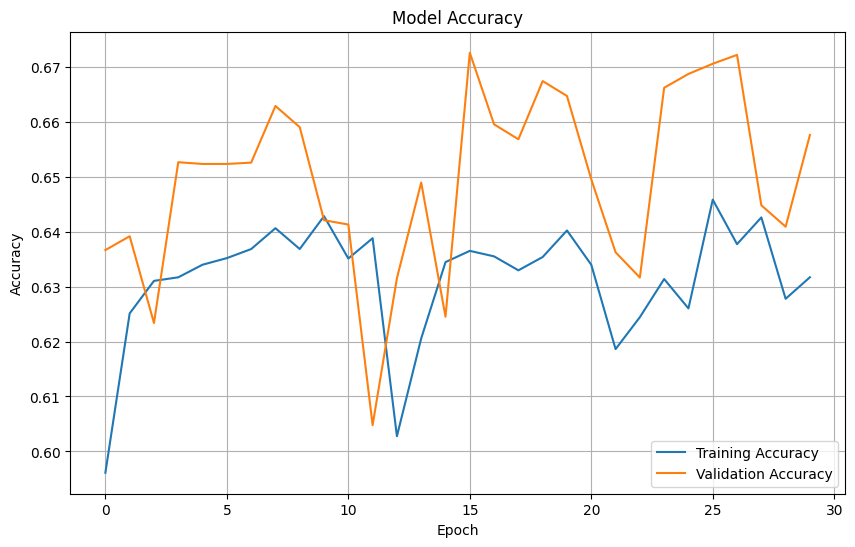

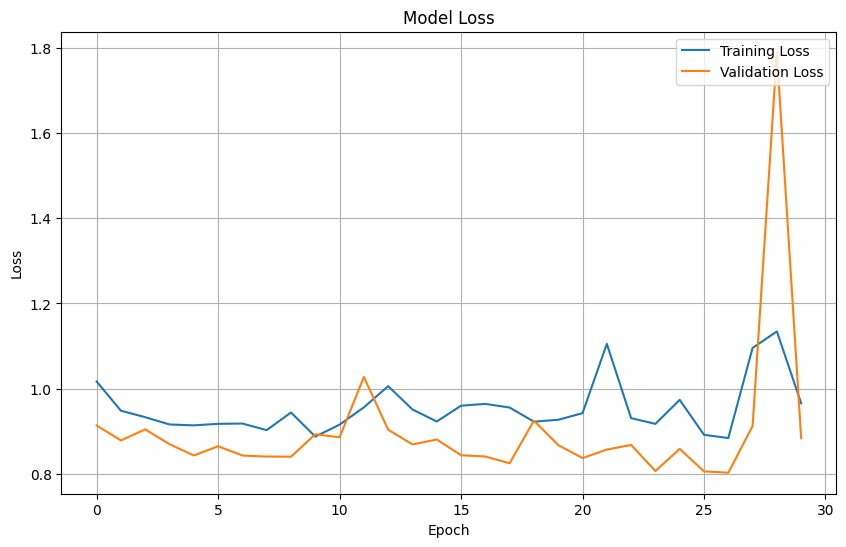

In [1]:
import pandas as pd
import numpy as np
import keras
import time
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

#============================================

# Load the dataset to understand its structure
file_path = 'Dataset.csv'
dataset = pd.read_csv(file_path)

# Check the data types and missing values
dataset_info = dataset.info()

# Analyze the distribution of target labels
label_columns = ['IT_M_Label', 'NST_M_Label']
label_distribution = dataset[label_columns].apply(pd.Series.value_counts)

print(dataset_info, label_distribution)

#=================================================

# Preprocessing

# Fill missing values with zeros
dataset.fillna(0, inplace=True)  # Fill missing values with 0

# Convert categorical labels to numerical format
label_mapping = {
    'Normal': 0,
    'ddos': 1,
    'ip-scan': 2,
    'mitm': 3,
    'port-scan': 4,
    'replay': 5
}
dataset['IT_M_Label'] = dataset['IT_M_Label'].map(label_mapping)
dataset['NST_M_Label'] = dataset['NST_M_Label'].map(label_mapping)

# Drop irrelevant columns
columns_to_drop = ['sAddress', 'rAddress', 'sMACs', 'rMACs', 'sIPs', 'rIPs', 'startDate', 'endDate']
dataset_cleaned = dataset.drop(columns=columns_to_drop)

# One-hot encode the 'protocol' column
dataset_encoded = pd.get_dummies(dataset_cleaned, columns=['protocol'])

# Perform correlation analysis
correlation_matrix = dataset_encoded.corr()

# Display correlation with the target labels
correlation_with_target = correlation_matrix[['IT_M_Label', 'NST_M_Label']]

# Separate features and labels
X = dataset_encoded.drop(columns=['IT_B_Label', 'IT_M_Label', 'NST_B_Label', 'NST_M_Label'])
Y = dataset_encoded['IT_M_Label']  # Multiclass

# Scaling features
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

# Balancing the dataset
smote = SMOTE(random_state=42)
X, Y = smote.fit_resample(X, Y)

# One-hot encode labels for multiclass classification
Y = to_categorical(Y, num_classes=len(label_mapping))

# Reshape features for RNN input
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

# Split the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print("Input size: ", X_train.shape[2])

# Hyper Parameters
learning_rate = 0.01
training_epochs = 30
num_layers = 4
num_classes = len(label_mapping)

# Building the model
model = Sequential()
model.add(Bidirectional(GRU(256, return_sequences=True, input_shape=(1, X_train.shape[2]), activation='relu', recurrent_activation='sigmoid', use_bias=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(GRU(128, return_sequences=True, activation='relu', recurrent_activation='sigmoid', use_bias=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(GRU(64, activation='relu', recurrent_activation='sigmoid', use_bias=True)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))  # Changed to softmax for multiclass

model.compile(loss='categorical_crossentropy',  # Changed to categorical_crossentropy for multiclass
              optimizer=Adam(learning_rate=learning_rate),
              metrics=['accuracy'])
            #SGD(learning_rate=learning_rate, decay=1e-5, momentum=0.9, nesterov=True)

import datetime
start = datetime.datetime.now()

history = model.fit(X_train, Y_train,
                    epochs=training_epochs,
                    batch_size=32, validation_split=0.2, verbose=1)

end = datetime.datetime.now()
elapsed = end - start
print('Total Training Time : ', str(elapsed))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
Y_pred = np.argmax(model.predict(X_test), axis=-1)
Y_test_labels = np.argmax(Y_test, axis=-1)

# Calculate metrics
report = classification_report(Y_test_labels, Y_pred, target_names=list(label_mapping.keys()))
conf_matrix = confusion_matrix(Y_test_labels, Y_pred)

print(f"Accuracy on Test Set: {accuracy}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

model.summary()

# Plot accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('acc.png')
plt.show()

# Plot loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.savefig('loss.png')
plt.show()
